In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy


def initialize_single_source(G, s):
    """
    Initialize the distance and predecessor attributes of all vertices in a graph G
    to infinity and None respectively, except for the source vertex s which should
    have a distance of 0.
    """
    # Initialize the distance and predecessor attributes of all vertices
    for v in G.nodes:
        G.nodes[v]['distance'] = np.inf
        G.nodes[v]['predecessor'] = None
    # Set the distance of the source vertex to 0
    G.nodes[s]['distance'] = 0


def relax(G, u, v, w):
    """
    Relax an edge (u, v) in a weighted graph G using the weight function w.
    """
    # If the distance to the destination vertex can be reduced by relaxing
    # the edge, then update the distance and predecessor attributes of the
    # destination vertex
    if G.nodes[v]['distance'] > G.nodes[u]['distance'] + w[(u, v)]:
        G.nodes[v]['distance'] = G.nodes[u]['distance'] + w[(u, v)]
        G.nodes[v]['predecessor'] = u


def bellman_ford(G, w, s):
    """
    Bellman-Ford algorithm for finding the shortest paths from a source vertex s
    to all other vertices in a weighted graph G.
    """
    # Initialize the distance and predecessor attributes of all vertices
    initialize_single_source(G, s)

    # Iterate |V| - 1 times
    for i in range(len(G.nodes) - 1):
        # Iterate over all edges
        for u, v, _ in G.edges:
            # Relax the edge
            relax(G, u, v, w)

    # Check for negative-weight cycles
    for u, v, _ in G.edges:
        # If the distance to the destination vertex can be reduced by relaxing
        # the edge, then there is a negative-weight cycle in the graph
        if G.nodes[v]['distance'] > G.nodes[u]['distance'] + w[(u, v)]:
            return False

    # Return True if no negative-weight cycles were found
    return True

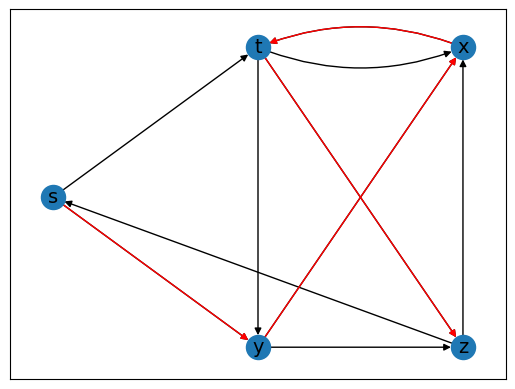

In [2]:
# Initialize the graph from Cormen et al.
G = nx.MultiDiGraph()

# Add the vertices
G.add_nodes_from(['s', 't', 'x', 'y', 'z'])

# Add the edges
G.add_edges_from([('s', 't'), ('s', 'y'), ('t', 'x'), ('t', 'y'), ('y', 'x'), ('y', 'z'), ('z', 's'), ('z', 'x'), ('t', 'z'), ('x', 't')])

# Set the edge weights
w = {('s', 't'): 6, ('s', 'y'): 7, ('t', 'x'): 5, ('t', 'y'): 8, ('y', 'x'): -3, ('y', 'z'): 9, ('z', 's'): 2, ('z', 'x'): 7, ('t', 'z'): -4, ('x', 't'): -2}

# Run the Bellman-Ford algorithm
bellman_ford(G, w, 's')

# Draw the graph
pos = {
    's': (0, 1),
    't': (1, 2),
    'x': (2, 2),
    'y': (1, 0),
    'z': (2, 0)
}

# Draw nodes
nx.draw_networkx_nodes(G, pos)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Draw edges with curvature
for (u, v, key) in G.edges(keys=True):
    # Only draw the curved edge if there also exists an edge from v to u
    if (v, u, key) in G.edges(keys=True):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], connectionstyle=f'arc3,rad=0.2')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], label=f"{w[(u, v)]}")

# Plot the shortest paths
for v in G.nodes:
    if G.nodes[v]['predecessor'] is not None:
        # Only draw the curved edge if there also exists an edge from v to u
        if (v, G.nodes[v]['predecessor'], 0) in G.edges(keys=True):
            nx.draw_networkx_edges(G, pos, edgelist=[(G.nodes[v]['predecessor'], v)], edge_color='r', connectionstyle=f'arc3,rad=0.2')
        else:
            nx.draw_networkx_edges(G, pos, edgelist=[(G.nodes[v]['predecessor'], v)], edge_color='r')